#Importing and Processing the dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load the dataset with specified encoding
data = pd.read_csv("/content/Global_Superstore2.csv", encoding='ISO-8859-1')

# Convert 'Order Date' to datetime format and set as the index
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)


<ipython-input-11-a67bd1b1b9e4>:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


#Visualizing monthly sales trends

<ipython-input-12-d4371b0cbf86>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Sales'].resample('M').sum()


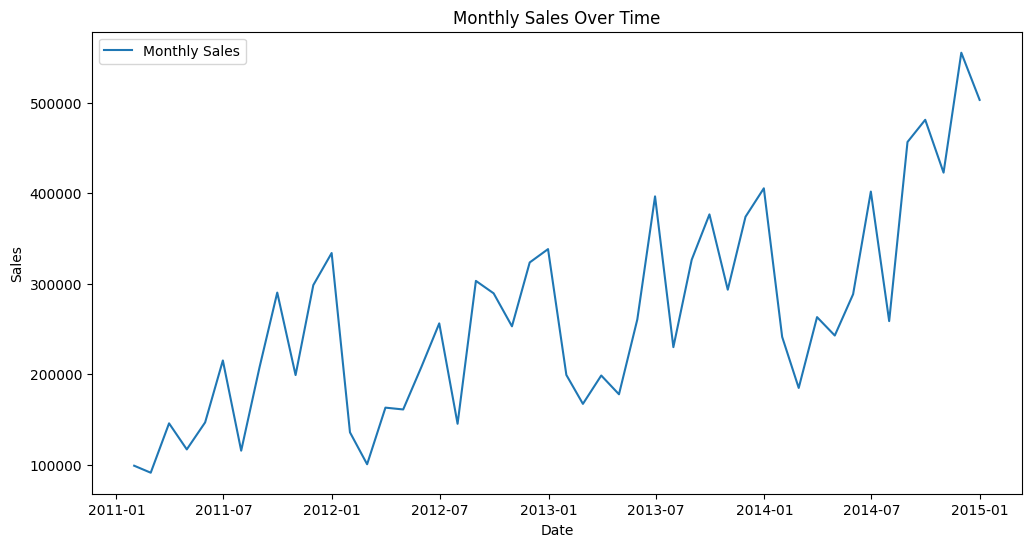

In [12]:
# Aggregate sales data by month
monthly_sales = data['Sales'].resample('M').sum()

# Plot the monthly sales data to inspect for trends and seasonality
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Over Time')
plt.legend()
plt.show()


#Splitting dataset into train and test split

In [13]:
# Define the split point (80% for training, 20% for testing)
split_point = int(len(monthly_sales) * 0.8)
train = monthly_sales[:split_point]
test = monthly_sales[split_point:]

# Display the sizes of each set
print(f"Training set size: {len(train)} records")
print(f"Testing set size: {len(test)} records")


Training set size: 38 records
Testing set size: 10 records


#Fitting the model

In [28]:
# Initialize and fit the Holt-Winters model
hw_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
hw_fit = hw_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


#Making predictions

In [29]:
# Forecast for the test period
hw_forecast = hw_fit.forecast(steps=len(test))

# Display the forecasted values
print(hw_forecast)


2014-03-31    239242.161884
2014-04-30    225731.406779
2014-05-31    310851.659922
2014-06-30    429614.073199
2014-07-31    213574.285340
2014-08-31    415190.042346
2014-09-30    482062.398206
2014-10-31    373426.389126
2014-11-30    517384.282844
2014-12-31    555311.990554
Freq: ME, dtype: float64


#Model Evaluation

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test, hw_forecast)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, hw_forecast)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = (abs((test - hw_forecast) / test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate accuracy as (100 - MAPE)
accuracy = 100 - mape
print(f"Forecasting Accuracy: {accuracy:.2f}%")


Mean Squared Error (MSE): 1248258190.525803
Mean Absolute Error (MAE): 31801.942006277783
Mean Absolute Percentage Error (MAPE): 8.64%
Forecasting Accuracy: 91.36%


#Plotting Train-Test vs Forecast graph

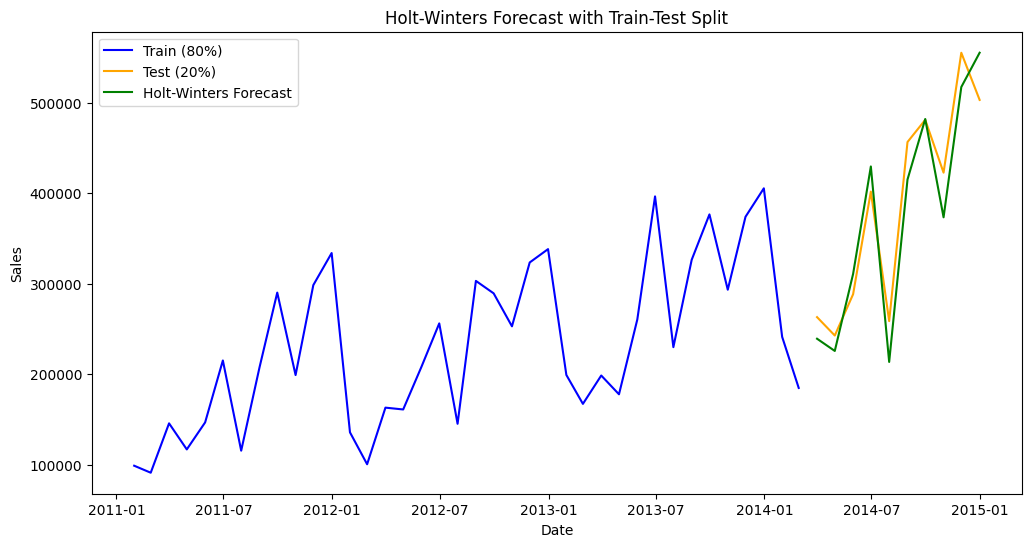

In [31]:
# Plot the actual and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train (80%)', color='blue')
plt.plot(test.index, test, label='Test (20%)', color='orange')
plt.plot(hw_forecast.index, hw_forecast, label='Holt-Winters Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Holt-Winters Forecast with Train-Test Split')
plt.legend()
plt.show()
